In [1]:
import pandas as pd

In [2]:
df=pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-10.parquet")

In [3]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,4.428699e+06,4428699,4428699,3.437812e+06,4.428699e+06,3.437812e+06,4.428699e+06,4.428699e+06,4.428699e+06,4.428699e+06,4.428699e+06,4.428699e+06,4.428699e+06,4.428699e+06,4.428699e+06,4.428699e+06,3.437812e+06,3.437812e+06,4.428699e+06
mean,1.881417e+00,2025-10-16 20:07:06.179353,2025-10-16 20:25:46.199610,1.274813e+00,6.696744e+00,4.055683e+00,1.619942e+02,1.616615e+02,9.417603e-01,1.825555e+01,1.175575e+00,4.778671e-01,2.990985e+00,5.307759e-01,9.449223e-01,2.697358e+01,2.173596e+00,1.469934e-01,5.355713e-01
min,1.000000e+00,2025-09-30 22:54:51,2025-09-30 23:04:41,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.000000e+02,-7.500000e+00,-5.000000e-01,-9.000000e+01,-9.500000e+01,-1.000000e+00,-8.010000e+02,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-10-09 08:20:44,2025-10-09 08:40:08.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.170000e+02,1.080000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.554000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-10-16 20:16:54,2025-10-16 20:35:38,1.000000e+00,1.890000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.350000e+01,0.000000e+00,5.000000e-01,2.220000e+00,0.000000e+00,1.000000e+00,2.145000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-10-24 14:53:38,2025-10-24 15:16:35,1.000000e+00,3.840000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.261000e+01,2.500000e+00,5.000000e-01,4.110000e+00,0.000000e+00,1.000000e+00,3.114000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-11-01 00:32:12,2025-11-03 09:38:20,9.000000e+00,2.763335e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.071900e+03,2.369000e+01,1.050000e+01,5.500000e+02,1.411800e+02,1.000000e+00,1.104590e+03,2.500000e+00,6.750000e+00,7.500000e-01
std,7.602906e-01,NaN,NaN,6.913772e-01,6.569620e+02,1.673265e+01,6.607760e+01,7.043272e+01,7.244619e-01,1.968846e+01,1.823128e+00,1.344743e-01,4.080894e+00,2.169216e+00,2.875662e-01,2.409999e+01,9.511162e-01,5.321739e-01,3.555875e-01


In [4]:
from sklearn.feature_extraction import DictVectorizer

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [6]:
categorical=['PU_DO']
numerical=['trip_distance']

In [7]:
ct = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical),
    ('num', 'passthrough', numerical)
])

In [8]:
def process_dataframe(dataframe, fit=False):
    # Calculate duration
    dataframe['duration'] = (dataframe.tpep_dropoff_datetime - dataframe.tpep_pickup_datetime).dt.total_seconds() / 60
    dataframe['PU_DO'] = dataframe['PULocationID'].astype(str) + '_' + dataframe['DOLocationID'].astype(str)
    # Ensure strings
    dataframe[categorical] = dataframe[categorical].astype(str)
    
    # Filter (Optional but recommended to remove outliers)
    dataframe = dataframe[(dataframe.duration >= 1) & (dataframe.duration <= 60)]
    
    # Features and Target
    if fit:
        Xf = ct.fit_transform(dataframe) # Learn from this data
    else:
        Xf = ct.transform(dataframe)     # Apply what we learned
        
    y = dataframe['duration'].values
    
    return Xf, y

In [9]:
X_train, y_train = process_dataframe(df,fit=True)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred=lr.predict(X_train)

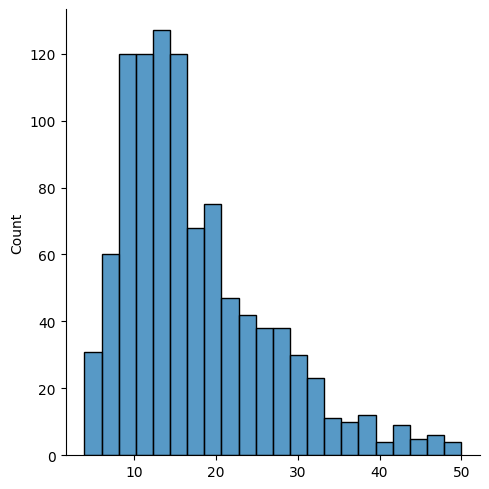

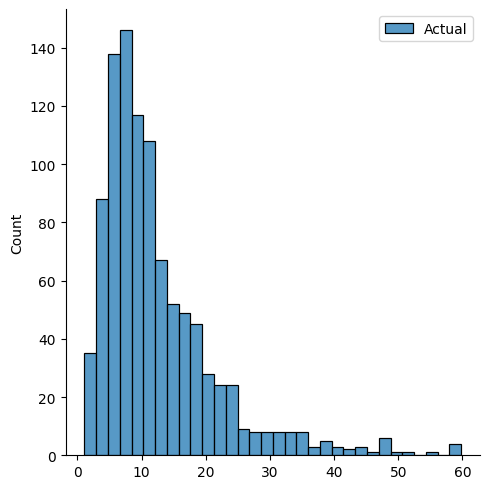

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(y_pred[:1000],label="Prediction")
sns.displot(y_train[:1000],label="Actual")
plt.legend()

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
import math
math.sqrt(mean_squared_error(y_train,y_pred))

6.6796119102589815

In [16]:
from sklearn.linear_model import Lasso
lr_lasso=Lasso()
lr_lasso.fit(X_train,y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [17]:
from sklearn.linear_model import Ridge
lr_ridge=Ridge()
lr_ridge.fit(X_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [18]:
import gc # Garbage Collector interface
# 1. Delete the heavy variables from the previous step
del df
del X_train
del y_train
del y_pred

# 2. Force the system to release the memory
gc.collect()

# 3. NOW load the new data
df_sept = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-09.parquet")

# 4. Process it
X_val, y_val = process_dataframe(df_sept)

In [19]:
math.sqrt(mean_squared_error(y_val,lr.predict(X_val)))

6.7944256934509175

In [20]:
math.sqrt(mean_squared_error(y_val,lr_lasso.predict(X_val)))

11.288107570126563

In [21]:
math.sqrt(mean_squared_error(y_val,lr_ridge.predict(X_val)))

6.558420460701419

In [22]:
import pickle

In [23]:
with open('lin_reg_model.bin', 'wb') as f_out:
    pickle.dump((ct,lr_ridge), f_out)